# 2023 Datathon - National waste data and reporting 2022
### Objective: Improvement in Waste Managament

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## import Files

In [2]:
dataset = pd.read_excel('DATASET.xlsx', sheet_name = 'Database 2022')

In [3]:
dataset.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,20185.549742,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0.000000,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71496 entries, 0 to 71495
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              71496 non-null  object 
 1   Jurisdiction      71496 non-null  object 
 2   Category          71496 non-null  object 
 3   Type              54228 non-null  object 
 4   Classification    71496 non-null  object 
 5   Total type        4901 non-null   object 
 6   Stream            71496 non-null  object 
 7   Management        71496 non-null  object 
 8   Fate              71496 non-null  object 
 9   Tonnes            71496 non-null  float64
 10  Core or non-core  71496 non-null  object 
 11  Sub-stream        71496 non-null  object 
 12  Cat. order        71496 non-null  object 
 13  Cat. no.          71496 non-null  object 
 14  Type order        54234 non-null  object 
 15  Type no.          54234 non-null  object 
 16                    8634 non-null   object

In [5]:
dataset.shape

(71496, 17)

In [6]:
parameter = pd .read_excel('DATASET.xlsx', sheet_name = 'Parameters', skiprows=3, header=None)

## Data Cleaning

In [7]:
# Good parameter dataset
parameter.drop(0, axis = 1, inplace=True)
parameter.drop(4, axis = 1, inplace=True)
parameter.columns = parameter.iloc[0]
parameter = parameter.drop(parameter.index[0])
parameter.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,NaN,Sub-stream,Cat. order,Cat. no.,Type order,Type no.
1,2006-2007,ACT,Ash,Ash,Category,All other waste total,C&D,Anaerobic digestion,Disposal,(numerical values),Core waste,NaN,01 MSW,01 Building and demolition materials,C1,01 Asphalt,T01
2,2008-2009,Australia,Building and demolition materials,Biosolids,Total,Ash waste total,C&I,Energy from waste facility,Energy recovery,NaN,Non-core waste,NaN,02 C&D,02 Metals,C2,"02 Bricks, concrete and pavers",T02
3,2009-2010,NSW,Glass,Asphalt,Type,Biosolids total,MSW,Landfill,Long-term storage,NaN,NaN,NaN,03 C&I core,03 Organics,C3,"03 Ceramics, tiles and pottery",T03
4,2010-2011,NT,Hazardous wastes,"Bricks, concrete and pavers",NaN,Hazwaste total,Total,Other disposal,Recycling,NaN,NaN,NaN,04 C&I (electricity generation),04 Paper & cardboard,C4,04 Plasterboard & cement sheeting,T04
5,2013-2014,Qld,Metals,"Ceramics, tiles and pottery",NaN,Mineral processing waste total,NaN,Recycling,Waste reuse,NaN,NaN,NaN,05 C&I (organic primary production),05 Plastics,C5,05 Rubble,T05


In [8]:
# Verify elements found is in parameter
dataset_columns = dataset.columns[0:8].to_list()+[dataset.columns[10]]
parameter_columns = parameter.columns[0:8].to_list()+[parameter.columns[10]]

# Initialize a dictionary to store differences
differences = {}

# Iterate over each column and find differences
for col in dataset_columns:
  for col in parameter_columns:
    # Convert the column values to sets and find differences
    diff = set(dataset[col]) - set(parameter[col])
    # If there are differences, store them in the dictionary
    if diff:
        differences[col] = diff

# Print or save the differences
for col, diff in differences.items():
    print(f"Differences in {col}: {diff}")

Differences in Year: {'2007-2008', '2011-2012', '2012-2013'}
Differences in Category: {'Biosolids'}
Differences in Type: {nan}


In [9]:
# Visualize the unique value in those Differences
for col, diff in differences.items():
    for val in diff:
        not_in_dataset = val not in set(dataset[col])
        not_in_parameter = val not in set(parameter[col])

        if not_in_dataset and not_in_parameter:
            print(f"Value {val} in column {col} not found in either dataframe")
        elif not_in_dataset:
            print(f"Value {val} in column {col} not found in dataset")
        elif not_in_parameter:
            print(f"Value {val} in column {col} not found in parameter")

Value 2007-2008 in column Year not found in parameter
Value 2011-2012 in column Year not found in parameter
Value 2012-2013 in column Year not found in parameter
Value Biosolids in column Category not found in parameter
Value nan in column Type not found in parameter


In [10]:
# Check if the sum up value is equal to total
grouped_dataset = dataset.groupby(['Year', 'Category', 'Classification'])['Tonnes'].sum().reset_index()
# grouped_dataset
pivot_dataset = grouped_dataset.pivot_table(values = 'Tonnes', index = 'Category', columns = 'Classification', aggfunc='sum')
pivot_dataset = pivot_dataset.drop(pivot_dataset.index[14])
pivot_dataset

Classification,Category,Total,Type
Category,,,
Ash,3.077185e+08,3.090087e+08,3.064282e+08
Biosolids,3.630495e+07,3.630495e+07,3.630495e+07
Building and demolition materials,4.326607e+08,NaN,2.658079e+08
Glass,2.837951e+07,NaN,1.555254e+07
Hazardous wastes,1.802964e+08,1.802964e+08,1.802964e+08
Metals,1.160547e+08,NaN,7.953283e+07
Mineral processing,1.147679e+08,1.147679e+08,1.147679e+08
Mining,4.256572e+09,4.240313e+09,1.679755e+09
Organic primary production,1.907887e+07,1.907887e+07,1.907887e+07


In [11]:
# Function for check if the total is calculated correctly
def check_row(row):
    # Check if 'Total' is not NaN
    if not pd.isnull(row['Total']):
        # Check if 'Total' is equal to 'Category' or 'Type'
        return row['Total'] == row['Category'] or row['Total'] == row['Type']
    # If 'Total' is NaN, you might want to return True or False based on your requirement
    return True

result = pivot_dataset.apply(check_row, axis=1)
print(result)

Category
Ash                                         False
Biosolids                                    True
Building and demolition materials            True
Glass                                        True
Hazardous wastes                             True
Metals                                       True
Mineral processing                           True
Mining                                      False
Organic primary production                   True
Organic processing                           True
Organics                                     True
Paper & cardboard                            True
Plastics                                     True
Textiles, leather & rubber (excl. tyres)     True
Unclassified materials                       True
dtype: bool


In [12]:
# Remove the Total so that each row
dataset = dataset.loc[(dataset['Classification']!= 'Total') & (dataset['Stream']!= 'Total')]
dataset

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN
5,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN
12,2020-2021,ACT,Building and demolition materials,Asphalt,Type,NaN,C&D,Recycling,Recycling,0.000000,Core waste,02 C&D,01 Building and demolition materials,C1,01 Asphalt,T01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71487,2006-2007,WA,Unclassified materials,NaN,Category,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,10 Unclassified materials,C10,NaN,NaN,NaN
71488,2006-2007,WA,Unclassified materials,NaN,Category,NaN,MSW,Energy from waste facility,Energy recovery,0.000000,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN
71489,2006-2007,WA,Unclassified materials,NaN,Category,NaN,MSW,Landfill,Disposal,0.000000,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN
71490,2006-2007,WA,Unclassified materials,NaN,Category,NaN,MSW,Landfill,Energy recovery,0.000000,Core waste,01 MSW,10 Unclassified materials,C10,NaN,NaN,NaN


In [13]:
category_dataset= dataset.loc[dataset['Classification']== 'Type']
category_yearly = category_dataset.groupby(['Year','Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'])['Tonnes'].sum().to_frame()
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', ['Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'], 'Tonnes').fillna(0)
category_yearly.sort_index(ascending = True, inplace = True)

category_yearly = category_yearly.replace(0.0, np.nan).fillna(method='ffill')
category_yearly

clean_data = pd.melt(category_yearly.reset_index(), id_vars = 'Year').fillna(0)


# Graphs

## Yearly trend by Category

In [14]:
# Yearly trend by Category
category_dataset= dataset.loc[dataset['Classification']== 'Type']
category_yearly = category_dataset.groupby(['Year','Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'])['Tonnes'].sum().to_frame()
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', ['Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'], 'Tonnes').fillna(0)
category_yearly.sort_index(ascending = True, inplace = True)

category_yearly = category_yearly.replace(0.0, np.nan).fillna(method='ffill')
category_yearly

clean_data = pd.melt(category_yearly.reset_index(), id_vars = 'Year', value_name='Tonnes').fillna(0)
category_dataset.fillna(0, inplace = True)
category_yearly = category_dataset.groupby(['Year', 'Category'])['Tonnes'].sum().to_frame()
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', 'Category', 'Tonnes').fillna(0)

In [15]:
category_yearly

Category,Ash,Biosolids,Building and demolition materials,Glass,Hazardous wastes,Metals,Mineral processing,Mining,Organic primary production,Organic processing,Organics,Paper & cardboard,Plastics,"Textiles, leather & rubber (excl. tyres)",Unclassified materials
Year,,,,,,,,,,,,,,,
2006-2007,1.435095e+07,1.367297e+06,2.665481e+06,575106.000000,4.803509e+06,1.264502e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.357157e+06,8.326280e+05,610.000000,13144.000000,9.230000e+05
2007-2008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.704820e+06,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
2008-2009,1.415445e+07,1.423046e+06,2.447514e+06,626596.000000,4.501515e+06,1.100414e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.739384e+06,9.831240e+05,610.000000,169180.000000,9.230000e+05
2009-2010,1.387944e+07,1.448968e+06,3.370703e+06,468937.000000,4.599301e+06,1.420142e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.445135e+06,1.035259e+06,399.000000,13379.000000,1.164739e+06
2010-2011,1.358083e+07,1.469001e+06,3.213051e+06,514802.000000,4.972617e+06,1.403342e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,9.160633e+06,1.253572e+06,403.000000,21848.000000,9.230000e+05
2011-2012,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.271998e+06,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
2012-2013,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.917158e+06,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
2013-2014,1.231634e+07,1.484371e+06,4.186200e+06,221381.000000,5.984559e+06,2.250059e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.980381e+06,1.709578e+06,24994.000000,15404.000000,1.255444e+06
2014-2015,1.223958e+07,1.449731e+06,8.630638e+06,482277.000000,5.431520e+06,3.683537e+06,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.165332e+07,2.506262e+06,17259.000000,31248.000000,1.258919e+06


In [16]:
category_yearly.describe()

Category,Ash,Biosolids,Building and demolition materials,Glass,Hazardous wastes,Metals,Mineral processing,Mining,Organic primary production,Organic processing,Organics,Paper & cardboard,Plastics,"Textiles, leather & rubber (excl. tyres)",Unclassified materials
count,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,15.000000,1.500000e+01
mean,1.017127e+07,1.210165e+06,8.421005e+06,475337.557354,6.009879e+06,2.463165e+06,3.825597e+06,7.067189e+07,6.359623e+05,1.564934e+06,8.734747e+06,1.148540e+06,61802.693562,36395.825803,5.194509e+05
std,5.344311e+06,6.320910e+05,7.808662e+06,295991.510815,1.176893e+06,1.844606e+06,1.009780e+07,1.895549e+08,2.463071e+06,6.060963e+06,4.700007e+06,7.227511e+05,110533.519266,41666.595794,4.923407e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.501515e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.144080e+07,1.395172e+06,2.556498e+06,345159.000000,5.122308e+06,1.182458e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.070507e+06,9.078760e+05,401.000000,13261.500000,1.074540e+05
50%,1.223958e+07,1.469001e+06,4.186200e+06,521101.000000,5.801334e+06,2.250059e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.739384e+06,1.253572e+06,17259.000000,31248.000000,3.021500e+05
75%,1.299170e+07,1.558663e+06,1.551687e+07,650479.000000,6.930742e+06,4.166039e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.199977e+07,1.569174e+06,50650.500000,47649.942550,9.230000e+05
max,1.435095e+07,1.700365e+06,2.059246e+07,906127.571951,8.005187e+06,4.778289e+06,2.923412e+07,6.196764e+08,9.539434e+06,2.347401e+07,1.278685e+07,2.506262e+06,337417.000841,169180.000000,1.258919e+06


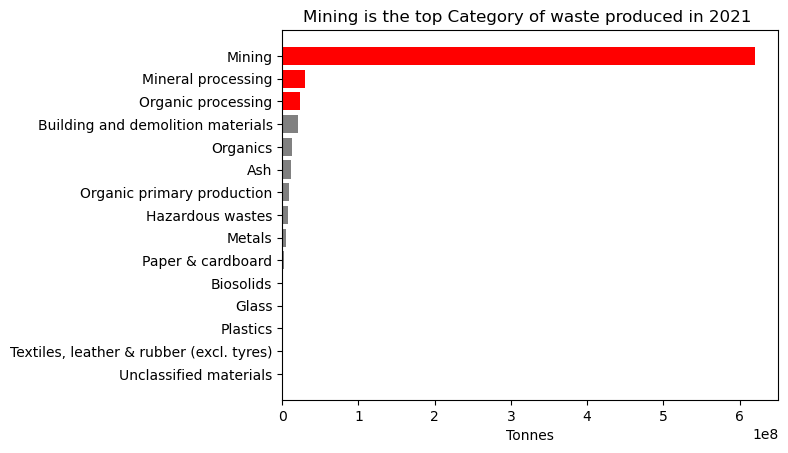

In [17]:
category_dataset= dataset.loc[dataset['Classification']== 'Type']
category_yearly = category_dataset.groupby(['Year','Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'])['Tonnes'].sum().to_frame()
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', ['Jurisdiction', 'Category', 'Type', 'Stream', 'Management', 'Fate', 'Core or non-core'], 'Tonnes').fillna(0)
category_yearly.sort_index(ascending = True, inplace = True)

category_yearly = category_yearly.replace(0.0, np.nan).fillna(method='ffill')
category_yearly

clean_data = pd.melt(category_yearly.reset_index(), id_vars = 'Year', value_name='Tonnes').fillna(0)
category_dataset.fillna(0, inplace = True)
category_yearly = category_dataset.groupby(['Year', 'Category'])['Tonnes'].sum().to_frame()
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', 'Category', 'Tonnes').fillna(0)


latest_distribution = category_yearly.loc[category_yearly.index =='2020-2021'].transpose().sort_values('2020-2021', ascending=False)
fig, ax = plt.subplots()

# Highlight the top 3 bars in red, others in grey
top_3_categories = latest_distribution.index[:3]
colors = ['red' if category in top_3_categories else 'grey' for category in latest_distribution.index]


ax.barh(latest_distribution.index, latest_distribution['2020-2021'],  align='center', color=colors)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Tonnes')
ax.set_title('Mining is the top Category of waste produced in 2021 ')

plt.show()

* This graph shows the amount of each category of wastes in 2021
   * Mining produced the most waste
   * There were 6 tonnes waste in 2021
* second and third runner up are Mineral processing and Organic Processing respectively
    * since ‘Mining’ is dominating the graph
* ‘Mining’ is eliminated in order to analyse about the other categories


## Yearly trend by Category (without Mining)

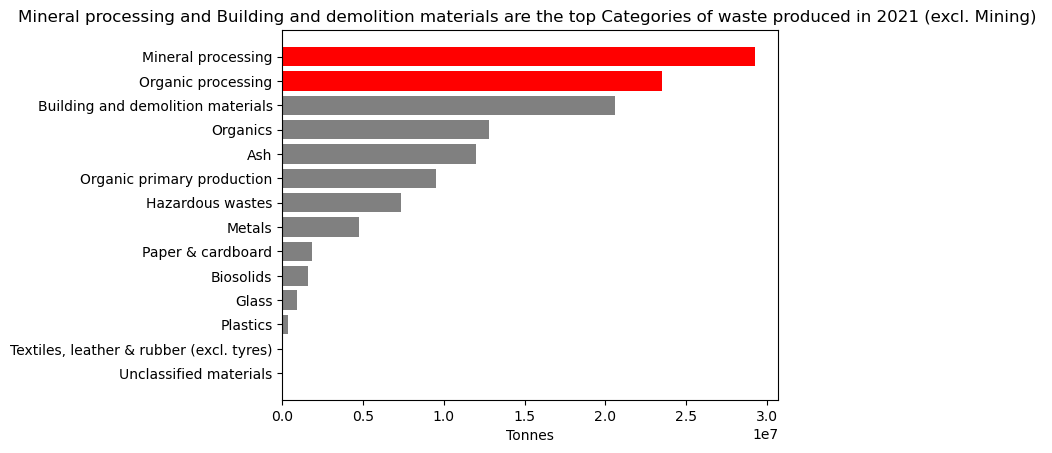

In [18]:
# category_yearly.drop(columns = ['Mining'], inplace =True)
latest_distribution = category_yearly.loc[(category_yearly.index =='2020-2021')].drop(columns = ['Mining']).transpose().sort_values('2020-2021', ascending=False)
fig, ax = plt.subplots()

top_2_categories = latest_distribution.index[:2]
colorss = ['red' if category in top_2_categories else 'grey' for category in latest_distribution.index]

ax.barh(latest_distribution.index, latest_distribution['2020-2021'],  align='center', color=colorss)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Tonnes')
ax.set_title('Mineral processing and Building and demolition materials are the top Categories of waste produced in 2021 (excl. Mining) ')

plt.show()

* we can see that there were about 3 Tonnes Mineral Processing waste
* while there were almost 2.5 Tonnes Organic Processing Waste in 2021


## Recycling & Reuse rate
(Stacked bar chart)

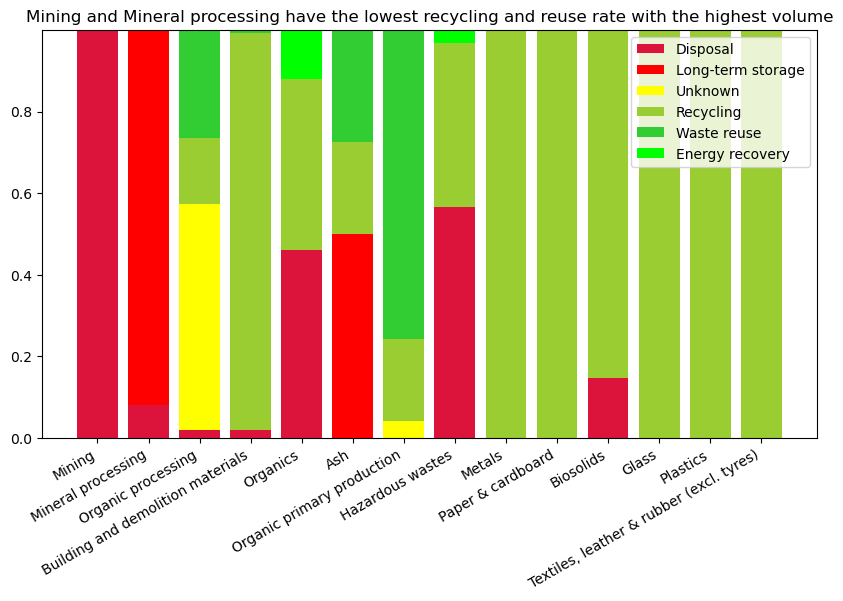

In [19]:
## Recycling & Reuse rate
cat_fate_dist = category_dataset.loc[(category_dataset['Year'] == '2020-2021') ].groupby(['Category', 'Fate']).sum('Tonnes').reset_index().pivot('Category', 'Fate', 'Tonnes')
cat_fate_dist = cat_fate_dist[['Disposal','Long-term storage', 'Unknown',  'Recycling',
        'Waste reuse', 'Energy recovery']]

color_scheme = {
    'Disposal': '#DC143C'	,
    'Long-term storage': '#FF0000',
    'Unknown': '#FFFF00',
    'Recycling' : '#9ACD32',
    'Waste reuse': '#32CD32',
    'Energy recovery': '#00FF00'
}
cat_fate_dist['total'] = cat_fate_dist.sum(axis=1)
cat_fate_dist.sort_values('total', ascending = False, inplace = True)
cat_fate_dist.drop(columns = ['total'], inplace = True)
cat_fate_dist = cat_fate_dist.div(cat_fate_dist.sum(axis=1), axis = 0)
cat_fate_dist.fillna(0, inplace = True)
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
cat_fate_dist.columns
added_col = cat_fate_dist[cat_fate_dist.columns[0]]
ax.bar(cat_fate_dist.index, cat_fate_dist[cat_fate_dist.columns[0]], label = cat_fate_dist.columns[0], color = color_scheme[cat_fate_dist.columns[0]])
for col in cat_fate_dist.columns[1:]:
    ax.bar(cat_fate_dist.index, cat_fate_dist[col], bottom = added_col, label =col, color = color_scheme[col])
    added_col = np.add(added_col,cat_fate_dist[col] )
fig.autofmt_xdate()
ax.set_title('Mining and Mineral processing have the lowest recycling and reuse rate with the highest volume')

plt.legend()

* the red bars illustrate the categories Mining and Mineral Processing have the liwest recycling and reuse rate
* Green is the majority, which means most of the waste were recycled and reused
* This shows Australia is eco-friendly
* Hazardous waste has a very low recycling and reuse rate
* Organic and Ash recycle or reuse rate are not ideal
    * since recycling or reuse them are quite doable


## Other waste trend

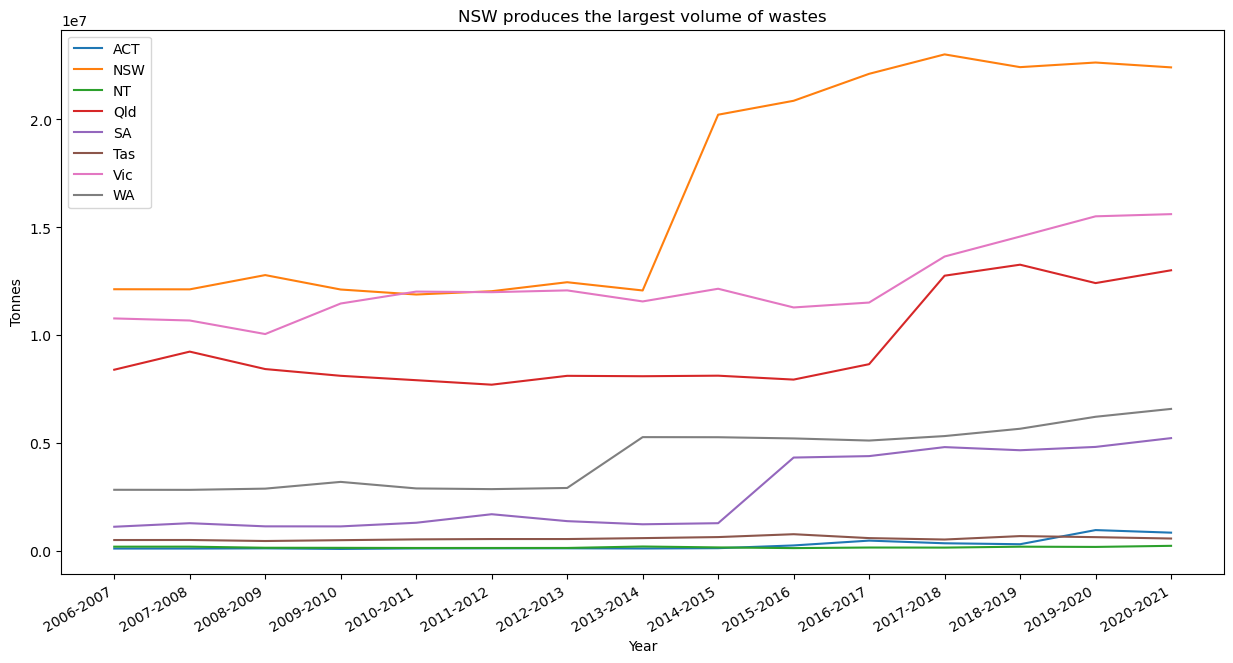

In [20]:
# Waste by Jurisdiction
type_dataset= clean_data.loc[(clean_data['Category'].isin(['Mineral processing', 'Organic primary production', 'Organic processing','Mining'])==False)]

jurisdiction_yearly_trend = type_dataset.groupby(['Year', 'Jurisdiction'])['Tonnes'].sum().to_frame().reset_index()
jurisdiction_yearly_trend = jurisdiction_yearly_trend.pivot('Year', 'Jurisdiction', 'Tonnes')

fig, ax = plt.subplots(figsize=(15, 8))
for col in jurisdiction_yearly_trend.columns:
    if col != 'Total':
        col_mean = jurisdiction_yearly_trend[col].mean()
        # some year data missing, fill by mean
        jurisdiction_yearly_trend.loc[jurisdiction_yearly_trend[col] == 0.0, col] = col_mean
        ax.plot(jurisdiction_yearly_trend.index, jurisdiction_yearly_trend[col]  ,label = col)
ax.set_title('NSW produces the largest volume of wastes')
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
fig.autofmt_xdate()

plt.legend()

Amount trend
* Building and demolition materials indicate a strong increasing trend, 
* while Hazardous waste is also trending up over the years. 


## Waste by Jurisdiction

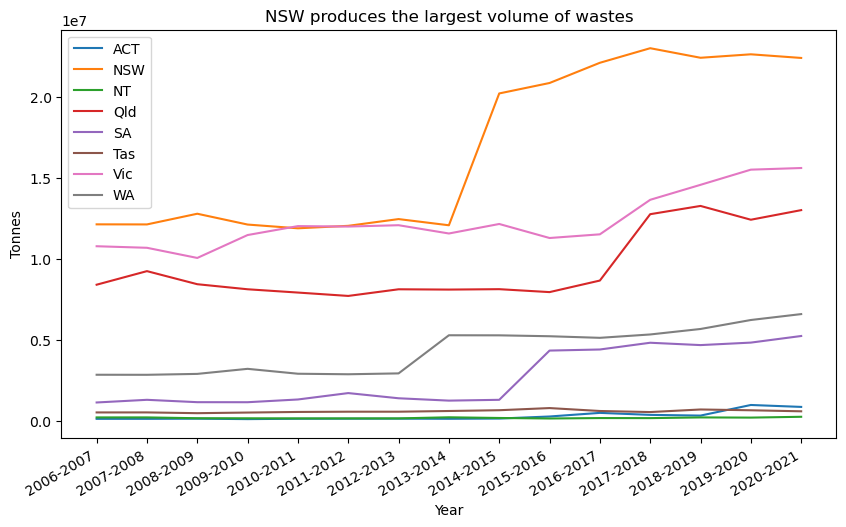

In [21]:
# Waste by Jurisdiction
type_dataset= clean_data.loc[(clean_data['Category'].isin(['Mineral processing', 'Organic primary production', 'Organic processing','Mining'])==False)]

jurisdiction_yearly_trend = type_dataset.groupby(['Year', 'Jurisdiction'])['Tonnes'].sum().to_frame().reset_index()
jurisdiction_yearly_trend = jurisdiction_yearly_trend.pivot('Year', 'Jurisdiction', 'Tonnes')

fig, ax = plt.subplots(figsize=(10, 6))
for col in jurisdiction_yearly_trend.columns:
    if col != 'Total':
        col_mean = jurisdiction_yearly_trend[col].mean()
        # some year data missing, fill by mean
        jurisdiction_yearly_trend.loc[jurisdiction_yearly_trend[col] == 0.0, col] = col_mean
        ax.plot(jurisdiction_yearly_trend.index, jurisdiction_yearly_trend[col]  ,label = col)
ax.set_title('NSW produces the largest volume of wastes')
ax.set_xlabel('Year')
ax.set_ylabel('Tonnes')
fig.autofmt_xdate()

plt.legend()

Jurisdiction - waste production and recycling
* New South Wales produced the most volume of wastes
* Victoria produced the second most volume of wastes
* It might because Sydney and Melbourne are located in these two states


## Recycle Rate Trend

In [22]:
# Recycle Rate Trend
type_dataset['Reuse/Recylce'] =type_dataset['Fate'].apply(lambda x: 'Y' if x in['Energy recovery', 'Recycling', 'Waste reuse'] else 'N')


jurisdiction_recycle_trend = type_dataset.groupby(['Year', 'Jurisdiction', 'Reuse/Recylce'])['Tonnes'].sum().to_frame().reset_index().pivot(['Year', 'Jurisdiction'],'Reuse/Recylce',	'Tonnes')
jurisdiction_recycle_trend = jurisdiction_recycle_trend['Y'].div(jurisdiction_recycle_trend.sum(axis= 1), axis = 0)
jurisdiction_recycle_trend = jurisdiction_recycle_trend.reset_index().rename(columns = {0: 'Reuse/Recylce Rate'}).pivot('Year', 'Jurisdiction','Reuse/Recylce Rate' )
type_dataset

,Year,Jurisdiction,Category,Type,Stream,Management,Fate,Core or non-core,Tonnes,Reuse/Recylce
0,2006-2007,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
1,2007-2008,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
2,2008-2009,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20899.767197,N
3,2009-2010,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21302.046389,N
4,2010-2011,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21717.183277,N
...,...,...,...,...,...,...,...,...,...,...
48715,2016-2017,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48716,2017-2018,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48717,2018-2019,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48718,2019-2020,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y


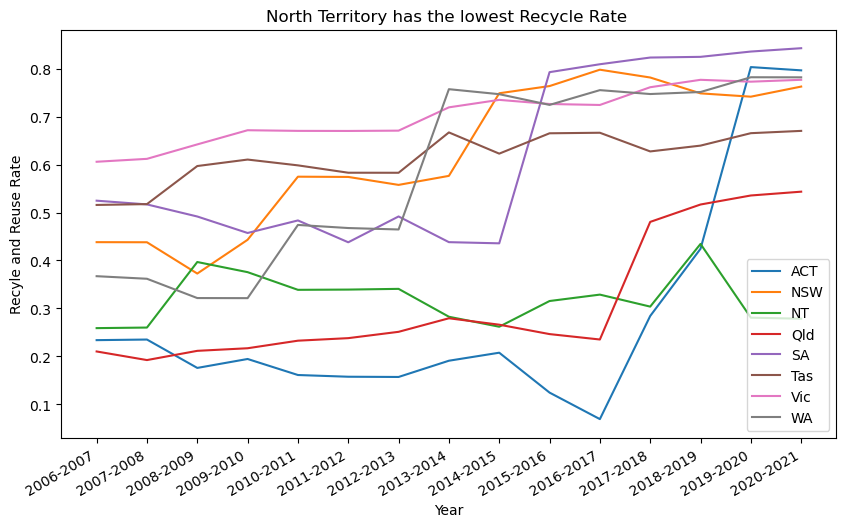

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in jurisdiction_recycle_trend.columns:
    if col != 'Total':
        col_mean = jurisdiction_recycle_trend[col].mean()
        # some year data missing, fill by mean
        jurisdiction_recycle_trend.loc[jurisdiction_recycle_trend[col] == 0.0, col] = col_mean
        ax.plot(jurisdiction_recycle_trend.index, jurisdiction_recycle_trend[col]  ,label = col)
ax.set_title('North Territory has the lowest Recycle Rate ')
ax.set_xlabel('Year')
ax.set_ylabel('Recyle and Reuse Rate')
fig.autofmt_xdate()

plt.legend()

Jurisdiction - recycle rate
* This is a graph showsthe recycle rate trend by jurisdiction
* It is obvious that the trend is increasing
* Victoria recycled the most while North Territory recycled the least in recent years



Jurisdiction
* Queensland
    * top 3 waste production
    * bottom 2 recycling rate

In [24]:
type_dataset.groupby(['Category', 'Stream']).sum('Tonnes').fillna(0).reset_index().pivot('Category', 'Stream', 'Tonnes')

Stream,C&D,C&I,MSW
Category,,,
Ash,NaN,1.976503e+08,NaN
Biosolids,NaN,2.253468e+07,NaN
Building and demolition materials,1.307901e+08,3.530455e+06,2.535556e+06
Glass,2.165075e+05,2.096218e+06,6.880108e+06
Hazardous wastes,2.886660e+07,6.308847e+07,NaN
Metals,9.787481e+06,2.328307e+07,8.381390e+06
Organics,1.148268e+07,5.963690e+07,8.858240e+07
Paper & cardboard,4.519063e+04,1.812801e+07,7.800081e+06
Plastics,4.484522e+04,4.501265e+05,5.204895e+05


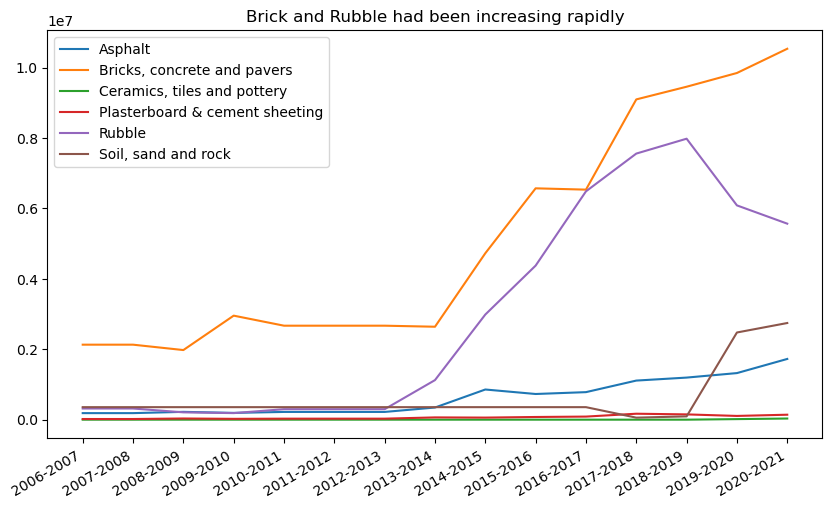

In [25]:
# Building and demolition materials

bnd_dataset = type_dataset.loc[type_dataset['Category'] == 'Building and demolition materials']
bnd_yearly = bnd_dataset.groupby(['Year', 'Type'])['Tonnes'].sum().to_frame()
bnd_yearly = pd.pivot(bnd_yearly.reset_index(), 'Year', 'Type', 'Tonnes').fillna(0)
# plt.figure( figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 6))
for col in bnd_yearly.columns:
    if col != 'Total':
        col_mean = bnd_yearly[col].mean()
        # some year data missing, fill by mean
        bnd_yearly.loc[bnd_yearly[col] == 0.0, col] = col_mean
        ax.plot(bnd_yearly.index, bnd_yearly[col] , label = col )

fig.autofmt_xdate()
ax.set_title('Brick and Rubble had been increasing rapidly')
plt.legend(['Asphalt', 'Bricks, concrete and pavers', 'Ceramics, tiles and pottery', 'Plasterboard & cement sheeting', 'Rubble', 'Soil, sand and rock'])



Category - B&D waste
* Mineral Processing has the lowest recycling and reuse rate. 
* We tried to break down the data to identify which materials are mainly discarded. 
* We can see that the category bricks, concrete and pavers is the primary reason for this low recycling and reuse rate in Mineral Processing.


In [26]:
type_dataset

,Year,Jurisdiction,Category,Type,Stream,Management,Fate,Core or non-core,Tonnes,Reuse/Recylce
0,2006-2007,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
1,2007-2008,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
2,2008-2009,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20899.767197,N
3,2009-2010,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21302.046389,N
4,2010-2011,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21717.183277,N
...,...,...,...,...,...,...,...,...,...,...
48715,2016-2017,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48716,2017-2018,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48717,2018-2019,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48718,2019-2020,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y


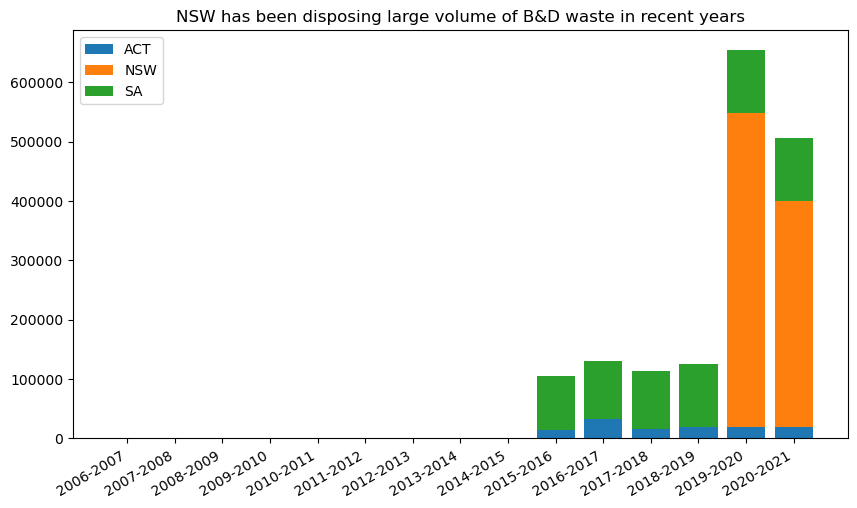

In [27]:
disposal_jury = bnd_dataset.loc[bnd_dataset['Fate'] == 'Disposal'].groupby(['Year', 'Jurisdiction']).sum('Tonnes').reset_index().pivot('Year', 'Jurisdiction', 'Tonnes').fillna(0)
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
disposal_jury.columns
added_col = disposal_jury[disposal_jury.columns[0]]
ax.bar(disposal_jury.index, disposal_jury[disposal_jury.columns[0]], label = disposal_jury.columns[0])
for col in disposal_jury.columns[1:]:
    ax.bar(disposal_jury.index, disposal_jury[col], bottom = added_col, label =col)
    added_col = np.add(added_col,disposal_jury[col] )
fig.autofmt_xdate()
ax.set_title('NSW has been disposing large volume of B&D waste in recent years')

plt.legend()

Category - B&D waste
* This graph shows New South Wales has been disposing large volume of B&D waste in recent years
* Compared to the period from 2015 to 2021, the volume of B&D waste was significantly lower from 2006 to 2014, which is why there are no bars visible in the graphs for the years 2006 to 2014.


In [28]:
type_dataset.head()

,Year,Jurisdiction,Category,Type,Stream,Management,Fate,Core or non-core,Tonnes,Reuse/Recylce
0,2006-2007,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
1,2007-2008,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
2,2008-2009,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20899.767197,N
3,2009-2010,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21302.046389,N
4,2010-2011,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21717.183277,N


## Hazardous waste components

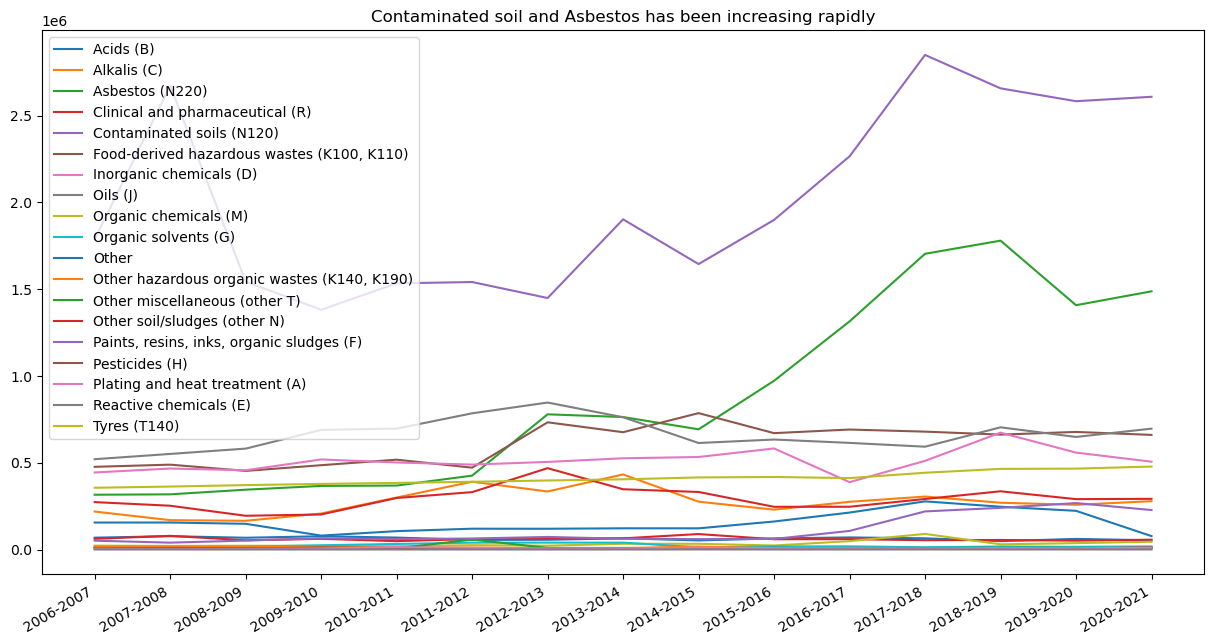

In [29]:
# Hazardous waste components

hazard_waste_dataset = type_dataset.loc[type_dataset['Category'] == 'Hazardous wastes']
hazard_waste_yearly = hazard_waste_dataset.groupby(['Year', 'Type'])['Tonnes'].sum().to_frame()
hazard_waste_yearly = pd.pivot(hazard_waste_yearly.reset_index(), 'Year', 'Type', 'Tonnes').fillna(0)
fig, ax = plt.subplots(figsize=(15, 8))

for col in hazard_waste_yearly.columns:
    if col != 'Total':
        col_mean = hazard_waste_yearly[col].mean()
        # some year data missing, fill by mean
        hazard_waste_yearly.loc[hazard_waste_yearly[col] == 0.0, col] = col_mean
        ax.plot(hazard_waste_yearly.index, hazard_waste_yearly[col] , label = col )
fig.autofmt_xdate()
ax.set_title('Contaminated soil and Asbestos has been increasing rapidly')

plt.legend()



Category - Hazardous waste
* In Hazardous waste, the disposal of contaminated soils and Asbestos have been rising rapidly since 2012


## top types of Harazdous wastes

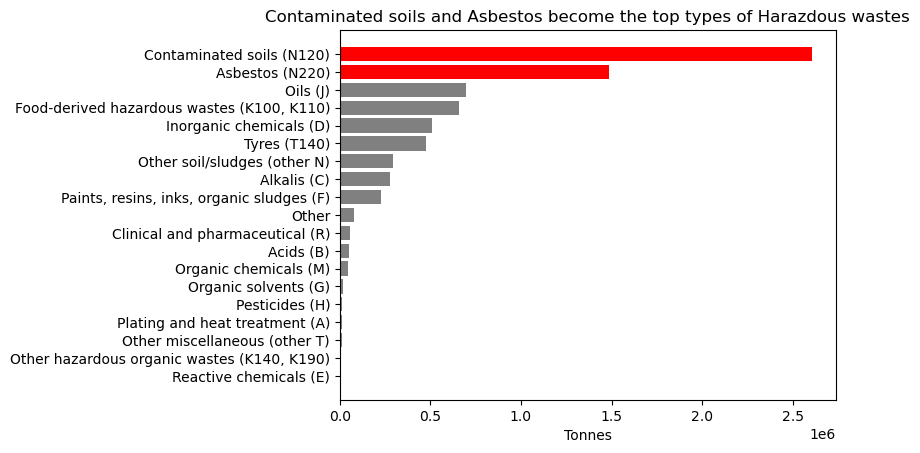

In [30]:
latest_distribution = hazard_waste_yearly.loc[hazard_waste_yearly.index =='2020-2021'].transpose().sort_values('2020-2021', ascending=False)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')

top_categoriess = latest_distribution.index[:2]
colorsss = ['red' if category in top_categoriess else 'grey' for category in latest_distribution.index]



ax.barh(latest_distribution.index, latest_distribution['2020-2021'],  align='center', color=colorsss)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Tonnes')
ax.set_title('Contaminated soils and Asbestos become the top types of Harazdous wastes')

plt.show()

Category - Hazardous waste
* This bar chart shows the amount of each types of waste in hazardous waste in 2020
* Contaminated soils produced 2.5 Tonnes
* Asbestos produced 1.5 Tonnes


In [31]:
category_dataset= dataset.loc[dataset['Classification']== 'Category']
category_yearly = category_dataset.groupby(['Year', 'Category'])['Tonnes'].sum().to_frame()

In [32]:
category_yearly = pd.pivot(category_yearly.reset_index(), 'Year', 'Category', 'Tonnes').fillna(0)
category_yearly.drop(columns = ['Mineral processing', 'Mining', 'Organic primary production', 'Organic processing' ])


Category,Ash,Biosolids,Building and demolition materials,Glass,Hazardous wastes,Metals,Organics,Paper & cardboard,Plastics,"Textiles, leather & rubber (excl. tyres)",Unclassified materials
Year,,,,,,,,,,,
2006-2007,14350949.0,1.367297e+06,1.212927e+07,1.091921e+06,4.803509e+06,2.437979e+06,1.047753e+07,4.589680e+06,2.522432e+06,7.970100e+05,9.230000e+05
2007-2008,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.704820e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2008-2009,14154452.0,1.423046e+06,1.315776e+07,1.155265e+06,4.501515e+06,2.192676e+06,1.109061e+07,5.259923e+06,2.676997e+06,1.000121e+06,9.230000e+05
2009-2010,13879441.5,1.448968e+06,1.355801e+07,1.011479e+06,4.599301e+06,3.992517e+06,1.114716e+07,3.896897e+06,2.731225e+06,8.808630e+05,1.164739e+06
2010-2011,13580834.5,1.469001e+06,1.254836e+07,1.024163e+06,4.972617e+06,3.958048e+06,1.086623e+07,4.009421e+06,2.605367e+06,8.696110e+05,9.230000e+05
2011-2012,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.271998e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2012-2013,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.917158e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2013-2014,12316341.0,1.484371e+06,1.262401e+07,9.144180e+05,5.984559e+06,4.424520e+06,1.149389e+07,4.562349e+06,2.532432e+06,1.044301e+06,1.255444e+06
2014-2015,12239576.0,1.449731e+06,1.367282e+07,9.568430e+05,5.431520e+06,4.284904e+06,1.165660e+07,4.571830e+06,2.515652e+06,1.105381e+06,1.258919e+06


## waterfall chart

In [33]:
import waterfall_chart


In [34]:
organic_dataset = type_dataset.loc[(type_dataset['Type'] != 'Total')& (type_dataset['Category'] == 'Organics')& (type_dataset['Year'] == '2020-2021')]
organic_dataset_total = organic_dataset.groupby('Stream').sum('Tonnes').reset_index()
organic_dataset = organic_dataset.loc[organic_dataset['Reuse/Recylce'] =='Y']
organic_dataset['Tonnes'] = organic_dataset.apply(lambda x: x['Tonnes'] * -1 if x['Reuse/Recylce'] == 'Y' else x['Tonnes'], axis = 1 )
organic_dataset = organic_dataset.groupby(['Stream', 'Fate']).sum('Tonnes')


In [35]:
organic_dataset_total

,Stream,Tonnes
0,C&D,9.131442e+05
1,C&I,4.778094e+06
2,MSW,7.221294e+06


In [36]:
organic_dataset_total['Fate'] = 'A'

In [37]:
organic_dataset = organic_dataset.reset_index().append(organic_dataset_total).sort_values(['Stream', 'Fate'], ascending = True)
organic_dataset.loc[organic_dataset['Fate']=='A', 'Fate' ] = 'Total'
organic_dataset


,Stream,Fate,Tonnes
0,C&D,Total,9.131442e+05
0,C&D,Energy recovery,-1.019637e+05
1,C&D,Recycling,-4.231424e+05
1,C&I,Total,4.778094e+06
2,C&I,Energy recovery,-5.825799e+05
3,C&I,Recycling,-1.982969e+06
4,C&I,Waste reuse,-4.711934e+03
2,MSW,Total,7.221294e+06
5,MSW,Energy recovery,-9.540549e+05
6,MSW,Recycling,-2.970097e+06


In [38]:
organic_dataset.set_index(['Stream', 'Fate'], inplace = True)

In [39]:
organic_dataset

Tonnes
Stream Fate                         
C&D    Total            9.131442e+05
       Energy recovery -1.019637e+05
       Recycling       -4.231424e+05
C&I    Total            4.778094e+06
       Energy recovery -5.825799e+05
       Recycling       -1.982969e+06
       Waste reuse     -4.711934e+03
MSW    Total            7.221294e+06
       Energy recovery -9.540549e+05
       Recycling       -2.970097e+06

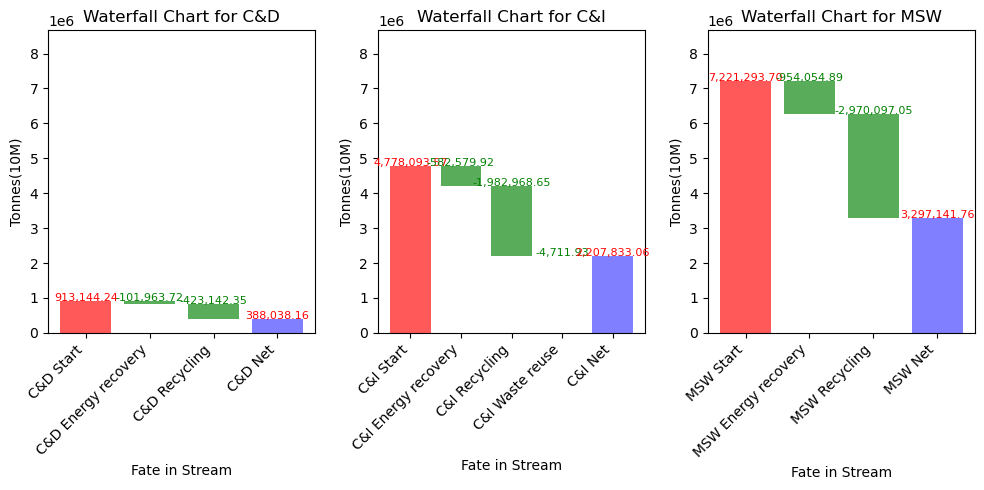

In [40]:
max_y_value = 0
for stream in organic_dataset.index.get_level_values('Stream').unique():
    stream_data = organic_dataset.loc[stream]
    values = [stream_data.loc['Total'].Tonnes]
    subtractions = [stream_data.loc[fate].Tonnes for fate in stream_data.index[1:]]
    values.extend(subtractions)
    net_value = stream_data.loc['Total'].Tonnes + sum(subtractions)
    max_value = max(np.cumsum(values))
    if max_value * 1.2 > max_y_value:
        max_y_value = max_value * 1.2

# Set up subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

# Iterate over each subplot and stream
for ax, stream in zip(axs, organic_dataset.index.get_level_values('Stream').unique()):
    # Extract data for current stream
    stream_data = organic_dataset.loc[stream]

    # Set up labels and values
    labels = [f"{stream} Start"]
    values = [stream_data.loc['Total'].Tonnes]
    subtractions = [stream_data.loc[fate].Tonnes for fate in stream_data.index[1:]]
    labels.extend([f"{stream} {fate}" for fate in stream_data.index[1:]])
    values.extend(subtractions)

    # Calculate net value
    net_value = stream_data.loc['Total'].Tonnes + sum(subtractions)

    # Define colors
    green = mcolors.to_rgba('g', alpha=0.65)
    red = mcolors.to_rgba('r', alpha=0.65)
    blue = mcolors.to_rgba('b', alpha=0.5)

    # Set colors for bars
    colors = [red] + [green if val < 0 else blue for val in values[1:]]
    bars = ax.bar(range(len(labels)), values, bottom=np.cumsum(values) - values, color=colors)

    # Add net bar
    net_position = len(labels)
    net_label = f"{stream} Net"
    net_bar = ax.bar(net_position, net_value, color=blue)
    labels.append(net_label)

    # Set y-limit to max_y_value
    ax.set_ylim(0, max_y_value)

    # Set x-ticks and labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=10)

    # Set axis labels and title
    ax.set_xlabel("Fate in Stream")
    ax.set_ylabel("Tonnes(10M)")
    ax.set_title(f"Waterfall Chart for {stream}")

    # Adding text on bars
    for bar, value in zip(bars, values):
        x_pos = bar.get_x() + bar.get_width() / 2
        if value < 0:
            y_pos = bar.get_y() - 20
            ax.text(x_pos, y_pos, f"-{abs(value):,.2f}", ha='center', color='green', fontsize=8)
        else:
            y_pos = bar.get_height() + 20
            ax.text(x_pos, y_pos, f"{value:,.2f}", ha='center', color='red', fontsize=8)

    # Adding text on net bar
    ax.text(net_position, net_value + 20, f"{net_value:,.2f}", ha='center', color='red', fontsize=8)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Category - organic waste
* This waterfall chart provide a snapshot of the current state of organic waste disposal in the area.
* MSW stands for municipal solid waste (MSW) from households and council operations
* C&I stands for commercial and industrial waste
* C&D stands for construction and demolition waste
* TOT means total
* ENE means energy recovery
* WAS means waste reuse
* REC means recycling
* green bars represent the waste
* Red bars represent the difference between the fates of waste, 
    * such as the amount of waste that was recycled or reused minus the amount of waste that was discarded.
* Blue bar at the end means the net total of waste
* MSW is the largest category of waste, which accounted for 47.7% of the total disposed waste.
* This suggests that there is an opportunity to reduce waste generation in this sector.


In [41]:
max_y_value = 0
for stream in organic_dataset.index.get_level_values('Stream').unique():
    stream_data = organic_dataset.loc[stream]
    values = [stream_data.loc['Total'].Tonnes]
    subtractions = [stream_data.loc[fate].Tonnes for fate in stream_data.index[1:]]
    values.extend(subtractions)
    net_value = stream_data.loc['Total'].Tonnes + sum(subtractions)
    max_value = max(np.cumsum(values))
    if max_value * 1.2 > max_y_value:
        max_y_value = max_value * 1.2  # Update max_y_value if needed

# Define colors
green = '#00FF00'
red = '#FF0000'
blue = '#0000FF'

# Iterate over each subplot and stream
for ax, stream in zip(axs, organic_dataset.index.get_level_values('Stream').unique()):
    # Extract data for current stream
    stream_data = organic_dataset.loc[stream]

    # Set up labels and values
    labels = [f"{stream} Start"]
    values = [stream_data.loc['Total'].Tonnes]
    subtractions = [stream_data.loc[fate].Tonnes for fate in stream_data.index[1:]]
    labels.extend([f"{stream} {fate}" for fate in stream_data.index[1:]])
    values.extend(subtractions)

    # Calculate net value
    net_value = stream_data.loc['Total'].Tonnes + sum(subtractions)

    # Set colors for bars
    colors = [green] + [red if val < 0 else blue for val in values[1:]]
    bars = ax.bar(range(len(labels)), values, bottom=np.cumsum(values) - values, color=colors)

    # Add net bar
    net_position = len(labels)
    net_label = f"{stream} Net"
    net_bar = ax.bar(net_position, net_value, color=blue)
    labels.append(net_label)

    # Set y-limit to max_y_value
    ax.set_ylim(0, max_y_value)

    # Set x-ticks and labels
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=10)

    # Set axis labels and title
    ax.set_xlabel("Fate in Stream")
    ax.set_ylabel("Tonnes(10M)")
    ax.set_title(f"Waterfall Chart for {stream}")

    # Adding text on bars
    for bar, value in zip(bars, values):
        x_pos = bar.get_x() + bar.get_width() / 2
        if value < 0:
            y_pos = bar.get_y() - 20
            ax.text(x_pos, y_pos, f"-{abs(value):,.2f}", ha='center', color='red', fontsize=8)
        else:
            y_pos = bar.get_height() + 20
            ax.text(x_pos, y_pos, f"{value:,.2f}", ha='center', color='green', fontsize=8)

    # Adding text on net bar
    ax.text(net_position, net_value + 20, f"{net_value:,.2f}", ha='center', color='green', fontsize=8)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(-28.277777777777786, 0.5, 'Tonnes')

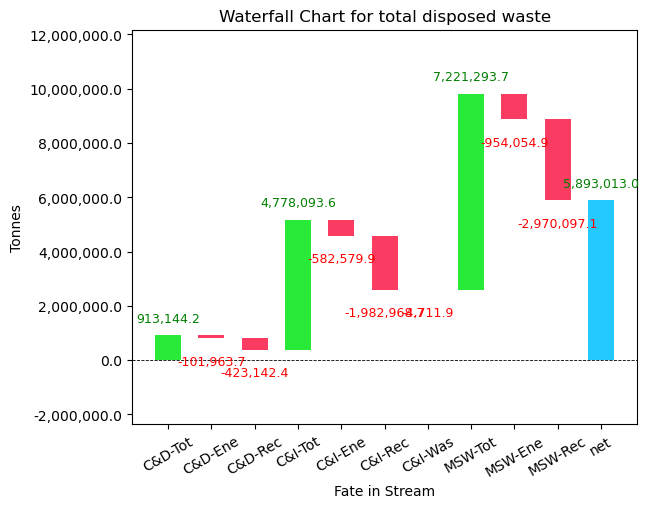

In [42]:
a = [ a+ '-' + b[:3] for a, b in organic_dataset.index]
b = organic_dataset['Tonnes'].values
waterfall_chart.plot(a, b)

# Add title and labels
plt.title("Waterfall Chart for total disposed waste")
plt.xlabel("Fate in Stream")
plt.ylabel("Tonnes")

In [43]:
type_dataset

,Year,Jurisdiction,Category,Type,Stream,Management,Fate,Core or non-core,Tonnes,Reuse/Recylce
0,2006-2007,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
1,2007-2008,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20142.591801,N
2,2008-2009,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,20899.767197,N
3,2009-2010,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21302.046389,N
4,2010-2011,ACT,Biosolids,Biosolids,C&I,Other disposal,Disposal,Core waste,21717.183277,N
...,...,...,...,...,...,...,...,...,...,...
48715,2016-2017,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48716,2017-2018,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48717,2018-2019,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y
48718,2019-2020,WA,Plastics,High density polyethylene (HDPE) (2),C&I,Waste reuse,Waste reuse,Core waste,0.000000,Y


In [44]:
type_dataset.Type.unique()

array(['Biosolids', 'Asphalt', 'Bricks, concrete and pavers',
       'Plasterboard & cement sheeting',
       'Glass from food and beverage containers', 'Acids (B)',
       'Alkalis (C)', 'Asbestos (N220)',
       'Clinical and pharmaceutical (R)', 'Contaminated soils (N120)',
       'Food-derived hazardous wastes (K100, K110)',
       'Inorganic chemicals (D)', 'Oils (J)', 'Organic chemicals (M)',
       'Organic solvents (G)', 'Other',
       'Other hazardous organic wastes (K140, K190)',
       'Other miscellaneous (other T)', 'Other soil/sludges (other N)',
       'Paints, resins, inks, organic sludges (F)', 'Pesticides (H)',
       'Plating and heat treatment (A)', 'Reactive chemicals (E)',
       'Tyres (T140)', 'Aluminium', 'Iron and steel',
       'Non-ferrous metals (ex. aluminium)', 'Food organics',
       'Garden organics', 'Other organics', 'Timber',
       'Polymer coated paperboard', 'Leather & rubber (excl. tyres)',
       'Textiles', 'Unclassified materials', 'Ash', 'Ca

# Summary

1. While B&D has a high recycling rate, its disposal rate was showing an upward trend, particularly in the state of New South Wales. This could be a cause for concern.
2. Hazardous waste had shown a sharp rising trend in two subtypes. Further studies need to be conducted to understand which industries are producing them.
3. More oraganic waste could be done in the Municipal solid waste category
4. Recommendation for Queensland. We suggest Queensland should focus on increasing recycling efforts as the volume of waste in Queensland is among the top 3 when compared to other states. Meanwhile the recycle rate ranks in bottom 2
